# Exercise 04 - Due Friday, October 21 at 12pm

*Objectives*: Gain experience loading a CSV dataset into a database model you define yourself and using SQL to explore its contents. Explore the data by writing and executing a number of SQL queries using common syntax and functions and describing your findings.

*Grading criteria*: The tasks should all be completed, and questions should all be answered with SQL queries in the space provided, unless a text answer is requested. Results should be correct, according to the embedded tests. The notebook itself should be completely reproducible; from start to finish, another person should be able to use the same code to obtain the same results as yours.  Note that you will receive no more than partial credit if you do not add text/markdown cells explaining your thinking at each major step in each problem.

*Deadline*: Friday, October 21, 12pm. Submit your notebook to Blackboard and push it to your GitHub repository.

## Setup - obtain data and create database

The US City Open Data Census has data on [restaurant inspections from all over the country](http://us-city.census.okfn.org/dataset/food-safety).  Let's take a look at data from Albuquerque.  *Note*: metadata and other details for this dataset are available at http://data.cabq.gov/business/foodinspections/.

Fyi, to save you a step, I've converted this file into a clean CSV file by using the `dos2unix` command to change its line endings and to switch it to use commas instead of tabs using `csvformat -t inputfile.csv > outputfile.csv`.

First we download the dataset:

In [1]:
!wget https://raw.githubusercontent.com/gwsb-istm-6212-fall-2016/syllabus-and-schedule/master/exercises/abq-food-inspections-fy2010.csv

--2016-10-24 15:38:12--  https://raw.githubusercontent.com/gwsb-istm-6212-fall-2016/syllabus-and-schedule/master/exercises/abq-food-inspections-fy2010.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.32.133
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.32.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5025226 (4.8M) [text/plain]
Saving to: ‘abq-food-inspections-fy2010.csv’

abq-food-inspection 100%[=====================>]   4.79M  --.-KB/s   in 0.1s   

2016-10-24 15:38:12 (44.7 MB/s) - ‘abq-food-inspections-fy2010.csv’ saved [5025226/5025226]



In [2]:
!mv abq-food-inspections-fy2010.csv e4.csv

## Problem 1 - examine the data (35 points)

Use `csvstat` and other tools as you see fit and observe its contents.  Review the metadata definitions linked to above.  Describe what you see:  What do all the columns mean?  Are there null values?  Which columns interest you the most?  Which columns present some complications or questions you would like to ask?

Insert a combination of code and text/markdown cells here to review the data and describe what you find.

In [3]:
!csvcut -n e4.csv

  1: FACILITY_NAME
  2: FACILITY_KEY
  3: SITE_ADDRESS
  4: CITY
  5: STATE
  6: ZIP
  7: OWNER_KEY
  8: OWNER_NAME
  9: NATURE_OF_BUSINESS
 10: STREET_NUMBER
 11: STREET_NAME
 12: STREET_TYPE
 13: POST_DIRECTIONAL
 14: PHONE
 15: PROGRAM_CATEGORY
 16: PROGRAM_CATEGORY_DESCRIPTION
 17: INSPECTION_DATE
 18: INSPECTION_TYPE
 19: INSPECTION_DESC
 20: SERIAL_NUM
 21: ACTION_CODE
 22: ACTION_DESC
 23: RESULT_CODE
 24: RESULT_DESC
 25: VIOLATION_CODE
 26: VIOLATION_DESC
 27: INSPECTION_MEMO


In [4]:
!head -5 e4.csv|csvcut -c1,2,3,4,5,6 | csvlook
!head -5 e4.csv|csvcut -c7,8,9,10,11,12 | csvlook
!head -5 e4.csv|csvcut -c13,14,15,16 | csvlook
!head -5 e4.csv|csvcut -c17,18,19,20 | csvlook
!head -5 e4.csv|csvcut -c21,22,23,24| csvlook
!head -5 e4.csv|csvcut -c25,26,27 | csvlook

|----------------------+--------------+-------------------------------+-------------+-------+--------|
|  FACILITY_NAME       | FACILITY_KEY | SITE_ADDRESS                  | CITY        | STATE | ZIP    |
|----------------------+--------------+-------------------------------+-------------+-------+--------|
|  00BSAY IT WITH CAKE | 50534        | 10200 GOLF COURSE RD NW STE B | ALBUQUERQUE | NM    | 87114  |
|  00BSAY IT WITH CAKE | 50534        | 10200 GOLF COURSE RD NW STE B | ALBUQUERQUE | NM    | 87114  |
|  00BSAY IT WITH CAKE | 50534        | 10200 GOLF COURSE RD NW STE B | ALBUQUERQUE | NM    | 87114  |
|  00BSAY IT WITH CAKE | 50534        | 10200 GOLF COURSE RD NW STE B | ALBUQUERQUE | NM    | 87114  |
|----------------------+--------------+-------------------------------+-------------+-------+--------|
|------------+---------------------+--------------------+---------------+-------------+--------------|
|  OWNER_KEY | OWNER_NAME          | NATURE_OF_BUSINESS | STREET_NUMBER |

In [5]:
!csvstat e4.csv

  1. FACILITY_NAME
	<class 'str'>
	Nulls: False
	Unique values: 2615
	5 most frequent values:
		SMITHS FOOD AND DRUG CENTERS INC:	154
		ISOTOPES PARK - OVATIONS:	93
		PER EHSII CECELIA GARCIA OOB LA REYNA DEL SUR:	85
		ISLETA AMPHITHEATER:	68
		ECHO INC:	68
	Max length: 77
  2. FACILITY_KEY
	<class 'int'>
	Nulls: False
	Min: 13
	Max: 101482
	Sum: 820405773
	Mean: 46730.79135338346
	Median: 50866.0
	Standard Deviation: 32659.794578837962
	Unique values: 2835
	5 most frequent values:
		46323:	93
		65863:	85
		80949:	68
		32817:	68
		91825:	66
  3. SITE_ADDRESS
	<class 'str'>
	Nulls: True
	Unique values: 2456
	5 most frequent values:
		1601 AVENIDA CESAR CHAVEZ SE:	94
		644 OLD COORS BLVD SW:	85
		8601 CENTRAL AV NE:	77
		2200 SUNPORT BLVD SE:	75
		5210 CENTRAL AV SE:	73
	Max length: 35
  4. CITY
	<class 'str'>
	Nulls: False
	Values: ALBUQUERQUE
  5. STATE
	<class 'str'>
	Nulls: False
	Values: NM, 87
  6. ZIP
	<class 'str'>
	Nulls: False
	Unique values: 48
	5 most frequent values:
		87110

#### Problem1 - Q1: What do all the columns mean?

1: FACILITY_NAME is the name of inspection facility

 2: FACILITY_KEY is the unique identification key of the inspection facility

 3: SITE_ADDRESS is the stress address of the inspection facility

 4: CITY is the city of the inspection facility

 5: STATE is the state of the inspection facility

 6: ZIP is the zip of the inspection facility

 7: OWNER_KEY is the unique identification key of the owner of inspection facility

 8: OWNER_NAME is the name of the owner of the inspection facility
 
 9: NATURE_OF_BUSINESS is the type of business

10: STREET_NUMBER is the stress number of the inspection facility

11: STREET_NAME is the stress name of the inspection facility

12: STREET_TYPE is the stress type of the inspection facility

13: POST_DIRECTIONAL is the postical direction of the inspection facility

14: PHONE is the phone of the inspection facility

15: PROGRAM_CATEGORY is the id that indicate the type of facility inspection

16: PROGRAM_CATEGORY_DESCRIPTION is the description of the id that indicate the type of facility inspection

17: INSPECTION_DATE is the date of inspection

18: INSPECTION_TYPE is code for type of inspection

19: INSPECTION_DESC is the description of inspection type

20: SERIAL_NUM is the unique id for the inspection activity

21: ACTION_CODE is the code of taken action

22: ACTION_DESC is the description of take action

23: RESULT_CODE is the code of inspection result

24: RESULT_DESC is the description of inspection result

25: VIOLATION_CODE is the code for the violation

26: VIOLATION_DESC is the escription of the violation

27: INSPECTION_MEMO is the note from the inspection

#### Problem1-Q2: Are there NULL values?

There are 12 columns have null values:
1. Site Address
2. Nature Of_Business
3. Street Number
4. Street Name
5. Street Type
6. Post Directional
7. Phone
8. Program Category Description
9. Inspection Type
10. Violation Code
11. Violation Desc
12. Inspection Memo

#### Problem1-Q3: Which columns do you interest most? Which columns present some complications or questions you would like to ask?

Columns: OWNER_NAME, RESULT_DESC

Questions: 

What are Top10 OWNER_NAMEs who have most restaurants?

What is the RESULT_DESC distribution of the Top3 OWNER_NAMEs who have most restaurants?


## Problem 2 - define a database model and load the data (35 points)

Based on what you found above, create and connect to a new database, define a database table in it, and load this dataset into it.  You may use either of the methods for this step you have seen in earlier class notebooks.  You may choose to eliminate variables/columns if they are not relevant or interesting to you - explain your reasoning if you do.  Either way, you should load a majority of the columns present in the source dataset into the database and all of its rows.

Once your data has loaded successfully, run a `COUNT(*)` query to verify that all the data has loaded correctly.

Insert a combination of code and text/markdown cells here to connect to your database, define your table, load its data, and verify the loaded records.

In [6]:
%load_ext sql

/opt/conda/lib/python3.5/site-packages/IPython/config.py:13: ShimWarning: The `IPython.config` package has been deprecated. You should import from traitlets.config instead.
  "You should import from traitlets.config instead.", ShimWarning)
/opt/conda/lib/python3.5/site-packages/IPython/utils/traitlets.py:5: UserWarning: IPython.utils.traitlets has moved to a top-level traitlets package.
  warn("IPython.utils.traitlets has moved to a top-level traitlets package.")


In [7]:
!echo 'redspot' | sudo -S service postgresql restart

[sudo] password for jovyan: Restarting PostgreSQL 9.5 database server: main.


In [8]:
!createdb -U dbuser exercise4

createdb: database creation failed: ERROR:  database "exercise4" already exists


In [9]:
%sql postgresql://dbuser@localhost/exercise4

'Connected: dbuser@exercise4'

In [10]:
%%sql
DROP TABLE IF EXISTS E4;
CREATE TABLE E4 (
    facility_name VARCHAR(77),
    facility_key INTEGER,
    site_address VARCHAR(35),
    city VARCHAR(12),
    state VARCHAR(2),
    zip VARCHAR(10),
    owner_key INTEGER,
    owner_name VARCHAR(82),
    nature_of_business VARCHAR(25),
    street_number VARCHAR(7),
    street_name VARCHAR(24),
    street_type VARCHAR(4),
    post_directional VARCHAR(2),
    phone VARCHAR(20),
    program_category VARCHAR(4),
    program_category_description VARCHAR(40),
    inspection_date TIMESTAMP,
    inspection_type VARCHAR(10),
    inspection_desc VARCHAR(32),
    serial_num VARCHAR(9),
    action_code VARCHAR(2),
    action_desc VARCHAR(34),
    result_code VARCHAR(2),
    result_desc VARCHAR(37),
    violation_code VARCHAR(10),
    violation_desc VARCHAR(50),
    inspection_memo VARCHAR(64)
    
)

Done.
Done.


[]

In [11]:
!pwd

/home/jovyan/work


In [12]:
%%sql
COPY E4 FROM '/home/jovyan/work/e4.csv'
CSV
HEADER
QUOTE '"'
DELIMITER ',';

17556 rows affected.


[]

In [13]:
%%sql
SELECT COUNT(*) FROM E4;

1 rows affected.


count
17556


In [14]:
%%sql
SELECT * FROM E4
LIMIT 10;

10 rows affected.


facility_name,facility_key,site_address,city,state,zip,owner_key,owner_name,nature_of_business,street_number,street_name,street_type,post_directional,phone,program_category,program_category_description,inspection_date,inspection_type,inspection_desc,serial_num,action_code,action_desc,result_code,result_desc,violation_code,violation_desc,inspection_memo
00BSAY IT WITH CAKE,50534,10200 GOLF COURSE RD NW STE B,ALBUQUERQUE,NM,87114,47341,OOBSAY IT WITH CAKE,CAKE DECORATING,10200,GOLF COURSE,RD,NW,5058339563,0405,Food Processor,2009-10-21 00:00:00,None,EMERGENCY RESPONSE,DA8009125,00,NON-GRADED,00,NOT APPLICABLE,68,Delivered Informational Brochure,None
00BSAY IT WITH CAKE,50534,10200 GOLF COURSE RD NW STE B,ALBUQUERQUE,NM,87114,47341,OOBSAY IT WITH CAKE,CAKE DECORATING,10200,GOLF COURSE,RD,NW,5058339563,0405,Food Processor,2009-10-21 00:00:00,None,ROUTINE FOOD INSPECTION,DA8009123,11,APPROVED,03,IN COMPLIANCE,00,No Violations Found,None
00BSAY IT WITH CAKE,50534,10200 GOLF COURSE RD NW STE B,ALBUQUERQUE,NM,87114,47341,OOBSAY IT WITH CAKE,CAKE DECORATING,10200,GOLF COURSE,RD,NW,5058339563,0405,Food Processor,2009-10-21 00:00:00,None,ROUTINE FOOD INSPECTION,DA8009123,11,APPROVED,03,IN COMPLIANCE,55,Additional Comments,None
00BSAY IT WITH CAKE,50534,10200 GOLF COURSE RD NW STE B,ALBUQUERQUE,NM,87114,47341,OOBSAY IT WITH CAKE,CAKE DECORATING,10200,GOLF COURSE,RD,NW,5058339563,0405,Food Processor,2010-04-14 00:00:00,None,ROUTINE FOOD INSPECTION,DA8010205,11,APPROVED,03,IN COMPLIANCE,00,No Violations Found,None
00BSAY IT WITH CAKE,50534,10200 GOLF COURSE RD NW STE B,ALBUQUERQUE,NM,87114,47341,OOBSAY IT WITH CAKE,CAKE DECORATING,10200,GOLF COURSE,RD,NW,5058339563,0405,Food Processor,2010-04-14 00:00:00,None,ROUTINE FOOD INSPECTION,DA8010205,11,APPROVED,03,IN COMPLIANCE,55,Additional Comments,None
2000 VIETNAM RESTAURANT,31468,601 SAN MATEO BLVD SE,ALBUQUERQUE,NM,87108,29294,2000 VIETMAN RESTAURANT,RESTAURANT,601,SAN MATEO,BLVD,SE,5052320900,0406,Food Service Establishment,2010-03-23 00:00:00,None,ROUTINE FOOD INSPECTION,DA8509472,11,APPROVED,03,IN COMPLIANCE,34,Food contact surfaces,None
2000 VIETNAM RESTAURANT,31468,601 SAN MATEO BLVD SE,ALBUQUERQUE,NM,87108,29294,2000 VIETMAN RESTAURANT,RESTAURANT,601,SAN MATEO,BLVD,SE,5052320900,0406,Food Service Establishment,2010-03-23 00:00:00,None,ROUTINE FOOD INSPECTION,DA8509472,11,APPROVED,03,IN COMPLIANCE,35,Non-Food contact surfaces,None
2000 VIETNAM RESTAURANT,31468,601 SAN MATEO BLVD SE,ALBUQUERQUE,NM,87108,29294,2000 VIETMAN RESTAURANT,RESTAURANT,601,SAN MATEO,BLVD,SE,5052320900,0406,Food Service Establishment,2010-03-23 00:00:00,None,ROUTINE FOOD INSPECTION,DA8509472,11,APPROVED,03,IN COMPLIANCE,55,Additional Comments,None
328 CHINESE CUISINE,72789,5617 MENAUL BLVD NE STE A,ALBUQUERQUE,NM,87110,66644,328 CHINESE CUISINE,None,5617,MENAUL,BLVD,NE,5058814468,0406,Food Service Establishment,2009-12-15 00:00:00,None,EMERGENCY RESPONSE,DA7757250,00,NON-GRADED,00,NOT APPLICABLE,68,Delivered Informational Brochure,None
328 CHINESE CUISINE,72789,5617 MENAUL BLVD NE STE A,ALBUQUERQUE,NM,87110,66644,328 CHINESE CUISINE,None,5617,MENAUL,BLVD,NE,5058814468,0406,Food Service Establishment,2009-12-15 00:00:00,None,ROUTINE FOOD INSPECTION,DA7757248,11,APPROVED,03,IN COMPLIANCE,00,No Violations Found,None


## Problem 3 - explore your data (30 points)

Now that the data is loaded, ask some questions of it!  Identify key variables of interest and note their ranges along with other useful descriptive statistics.  Choose and define a few lines of inquiry, execute queries for each, and describe what you find in your result sets.  Use any query techniques we've seen in class, including aggregate functions, transformations, subqueries, or others as appropriate. 

If you find interesting patterns, adding plots to your exploration would be useful.

Insert a combination of code and text/markdown cells here to explore your data.

### Aggregate Part

Question: What are Top10 OWNER_NAMEs who have most restaurants?

In [15]:
%%sql
SELECT owner_name, COUNT(*)as count
FROM E4
GROUP BY owner_name
ORDER BY count DESC limit(10)

10 rows affected.


owner_name,count
APS,792
SMITHS FOOD AND DRUG CENTERS INC,321
CIRCLE K STORES INC,277
ALBERTSONS,228
WAL MART STORES EAST LP,156
BLAKES LOTABURGER LLC,150
PALO ALTO INC,146
SCS BEVERAGE INC,138
WALGREENS CO,137
STARBUCKS CORP,123


<Container object of 10 artists>

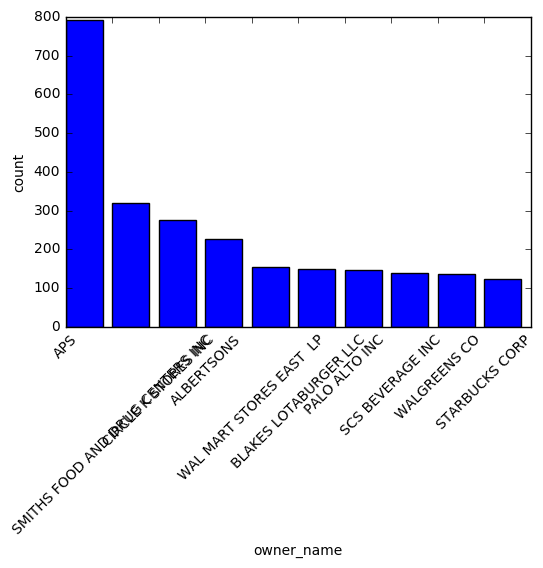

In [16]:
%matplotlib inline
result=_
result.bar()

### Transformation

Create a new Table called inspection_information recording inspection_date, inspection_year, inspection_month and so on.

In [17]:
%%sql
DROP TABLE IF EXISTS inspection_information;
CREATE TABLE inspection_information (
    id SERIAL,
    inspection_date CHAR(10),
    inspection_year INTEGER,
    inspection_month INTEGER,
    inspection_day INTEGER,
    day_of_week_str CHAR(9),
    day_of_week INTEGER,
    is_weekend BOOLEAN,
    is_weekday BOOLEAN,
    hour_24 INTEGER,
    quarter INTEGER
);

Done.
Done.


[]

In [18]:
%%sql
INSERT INTO inspection_information (inspection_date, inspection_year, inspection_month, inspection_day, day_of_week_str, day_of_week,
                  is_weekend, is_weekday, hour_24, quarter)
SELECT TO_CHAR(inspection_date, 'YYYY-MM-DD') AS inspection_date, 
    CAST(TO_CHAR(inspection_date, 'YYYY') AS INTEGER) AS inspection_year,
    CAST(TO_CHAR(inspection_date, 'MM') AS INTEGER) AS inspection_month,
    CAST(TO_CHAR(inspection_date, 'DD') AS INTEGER) AS inspection_date,
    TO_CHAR(inspection_date, 'Day') AS day_of_week_str,
    CAST(TO_CHAR(inspection_date, 'D') AS INTEGER) AS day_of_week,
    CASE WHEN CAST(TO_CHAR(inspection_date, 'D') AS INTEGER) IN (1, 7) 
        THEN TRUE
        ELSE FALSE
    END AS is_weekend,
    CASE WHEN CAST(TO_CHAR(inspection_date, 'D') AS INTEGER) NOT IN (1, 7) 
        THEN TRUE
        ELSE FALSE
    END AS is_weekday,
    CAST(TO_CHAR(inspection_date, 'HH24') AS INTEGER) AS hour_24,
    CAST(TO_CHAR(inspection_date, 'Q') AS INTEGER) AS quarter
FROM E4;

17556 rows affected.


[]

In [19]:
%%sql
SELECT *
FROM inspection_information
LIMIT(10);

10 rows affected.


id,inspection_date,inspection_year,inspection_month,inspection_day,day_of_week_str,day_of_week,is_weekend,is_weekday,hour_24,quarter
1,2009-10-21,2009,10,21,Wednesday,4,False,True,0,4
2,2009-10-21,2009,10,21,Wednesday,4,False,True,0,4
3,2009-10-21,2009,10,21,Wednesday,4,False,True,0,4
4,2010-04-14,2010,4,14,Wednesday,4,False,True,0,2
5,2010-04-14,2010,4,14,Wednesday,4,False,True,0,2
6,2010-03-23,2010,3,23,Tuesday,3,False,True,0,1
7,2010-03-23,2010,3,23,Tuesday,3,False,True,0,1
8,2010-03-23,2010,3,23,Tuesday,3,False,True,0,1
9,2009-12-15,2009,12,15,Tuesday,3,False,True,0,4
10,2009-12-15,2009,12,15,Tuesday,3,False,True,0,4


### Subquery

In [20]:
%%sql
SELECT owner_name, result_desc, COUNT(*) as count
FROM E4
WHERE owner_name in(SELECT owner_name
                   FROM E4
                   GROUP BY owner_name
                  ORDER BY COUNT(*) DESC
                   LIMIT(3))
GROUP BY result_desc, owner_name
ORDER BY owner_name


13 rows affected.


owner_name,result_desc,count
APS,TRAINING RECEIVED,7
APS,NOT APPLICABLE,117
APS,OUT OF BUSINESS,3
APS,IN COMPLIANCE,665
CIRCLE K STORES INC,NOT APPLICABLE,27
CIRCLE K STORES INC,IN COMPLIANCE,241
CIRCLE K STORES INC,OUT OF BUSINESS,9
SMITHS FOOD AND DRUG CENTERS INC,IN COMPLIANCE,272
SMITHS FOOD AND DRUG CENTERS INC,TRAINING RECEIVED,2
SMITHS FOOD AND DRUG CENTERS INC,EMBARGO,1


<Container object of 13 artists>

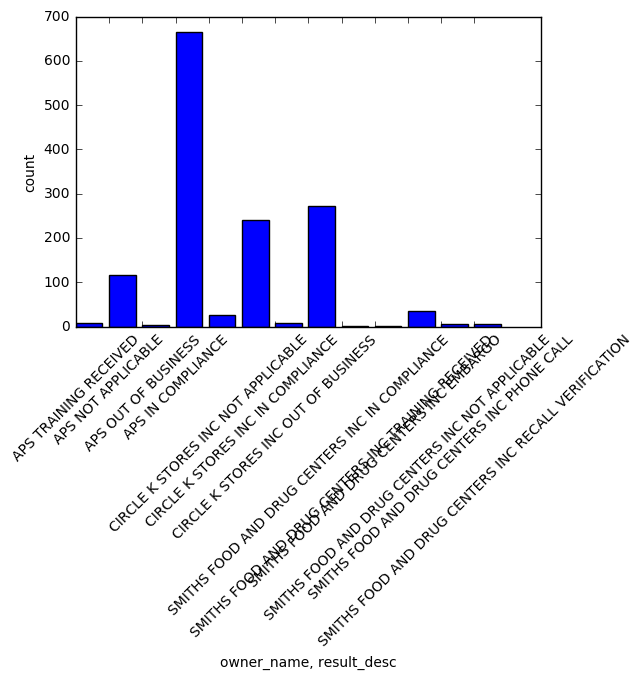

In [21]:
%matplotlib inline
result=_
result.bar()

## Bonus (10 points)

We have seen a few simple techniques for normalizing data in class.  Choose a column or set of columns that might be redundant and normalize them out to another table:

* Identify the columns to normalize in the source data table
* Create one or more new tables to hold the normalized records
* Extract data into the new tables
* Re-insert the new foreign key references from the new table into the source table

In [22]:
%%sql
SELECT COUNT(*),'program_category' as attribute_name
FROM (SELECT DISTINCT program_category
     FROM E4)table1
UNION
SELECT COUNT(*),'program_category_description' as attribute_name
FROM (SELECT DISTINCT program_category_description
     FROM E4)table2

2 rows affected.


count,attribute_name
25,program_category
25,program_category_description


In [23]:
%%sql
SELECT DISTINCT PROGRAM_CATEGORY  || ' ' || PROGRAM_CATEGORY_DESCRIPTION AS PROGRAM_CATEGORY_DESCRIPTION, PROGRAM_CATEGORY, PROGRAM_CATEGORY_DESCRIPTION
FROM E4;

25 rows affected.


program_category_description,program_category,program_category_description_1
0605 Seasonal Location -Food Service Permit,0605,Seasonal Location -Food Service Permit
0404 Institutional Kitchen,0404,Institutional Kitchen
None,0411,None
1001 Mobile Pre-Packaged,1001,Mobile Pre-Packaged
0607 Retail - Self Service & Prepackage Foods,0607,Retail - Self Service & Prepackage Foods
0406 Food Service Establishment,0406,Food Service Establishment
0407 Limited Menu,0407,Limited Menu
0602 Meat Market,0602,Meat Market
0408 School,0408,School
0609 Retail - Meat/Seafood,0609,Retail - Meat/Seafood


In [24]:
%%sql
SELECT COUNT(*),'result_code' as attribute_name
FROM (SELECT DISTINCT result_code
     FROM E4)table1
UNION
SELECT COUNT(*),'result_desc' as attribute_name
FROM (SELECT DISTINCT result_desc
     FROM E4)table2

2 rows affected.


count,attribute_name
19,result_code
19,result_desc


In [25]:
%%sql
SELECT DISTINCT RESULT_CODE  || ' ' || RESULT_DESC AS CODE_RESULT, RESULT_CODE, RESULT_DESC
FROM E4;

19 rows affected.


code_result,result_code,result_desc
22 OUT OF BUSINESS,22,OUT OF BUSINESS
11 FACILITY CLOSED AT TIME OF INSPECTION,11,FACILITY CLOSED AT TIME OF INSPECTION
18 TRAINING RECEIVED,18,TRAINING RECEIVED
06 UPGRADE,06,UPGRADE
00 NOT APPLICABLE,00,NOT APPLICABLE
12 PERMIT REINSTATEMENT,12,PERMIT REINSTATEMENT
10 PERMISSION TO OPERATE,10,PERMISSION TO OPERATE
05 DOWNGRADE,05,DOWNGRADE
25 PLAN REVIEW -APPROVED,25,PLAN REVIEW -APPROVED
27 RECALL VERIFICATION,27,RECALL VERIFICATION


In [26]:
%%sql
SELECT COUNT(*),'violation_code' as attribute_name
FROM (SELECT DISTINCT violation_code
     FROM E4)table1
UNION
SELECT COUNT(*),'violation_desc' as attribute_name
FROM (SELECT DISTINCT violation_desc
     FROM E4)table2

2 rows affected.


count,attribute_name
71,violation_desc
133,violation_code


In [27]:
%%sql
SELECT COUNT(*),'owner_name' as attribute_name
FROM (SELECT DISTINCT owner_name
     FROM E4)table1
UNION
SELECT COUNT(*),'owner_key' as attribute_name
FROM (SELECT DISTINCT owner_key
     FROM E4)table2

2 rows affected.


count,attribute_name
1852,owner_name
1892,owner_key


In [28]:
%%sql
SELECT COUNT(*),'street_number' as attribute_name
FROM (SELECT DISTINCT street_number
     FROM E4)table1
UNION
SELECT COUNT(*),'street_name' as attribute_name
FROM (SELECT DISTINCT street_name
     FROM E4)table2

2 rows affected.


count,attribute_name
405,street_name
1350,street_number


In [29]:
%%sql
SELECT COUNT(*),'action_code' as attribute_name
FROM (SELECT DISTINCT action_code
     FROM E4)table1
UNION
SELECT COUNT(*),'action_desc' as attribute_name
FROM (SELECT DISTINCT action_desc
     FROM E4)table2

2 rows affected.


count,attribute_name
8,action_code
8,action_desc


In [30]:
%%sql
SELECT DISTINCT ACTION_CODE  || ' ' || ACTION_DESC AS CODE_ACTION, ACTION_CODE, ACTION_DESC
FROM E4;

8 rows affected.


code_action,action_code,action_desc
12 NO PERMIT APPLICATION ISSUED,12,NO PERMIT APPLICATION ISSUED
03 FACILITY CLOSED AT TIME OF SERVICE,03,FACILITY CLOSED AT TIME OF SERVICE
10 ANNUAL STICKER NOT ISSUED,10,ANNUAL STICKER NOT ISSUED
09 ANNUAL STICKER ISSUED,09,ANNUAL STICKER ISSUED
06 UNSATISFACTORY,06,UNSATISFACTORY
17 FOOD PERMIT SUSPENSION,17,FOOD PERMIT SUSPENSION
11 APPROVED,11,APPROVED
00 NON-GRADED,00,NON-GRADED


From the data exploration, we can see that only in these pairs, there is a one-to-one relationship:
    action-code and action-desc
    result-code and result-desc
    program-category and program-category-description
To avoid redundancy on the data, I will create a result table and set result-code as PRIMARY KEY for this table and as FOREIGN KEY for E4.

In [31]:
%%sql
DROP TABLE IF EXISTS result;
CREATE TABLE result (
    result_code VARCHAR(2),
    result_desc VARCHAR(37),
    PRIMARY KEY (result_code)
)

Done.
Done.


[]

In [32]:
%%sql
INSERT INTO result (result_code, result_desc)
SELECT DISTINCT result_code, result_desc
FROM E4

19 rows affected.


[]

In [33]:
%%sql
SELECT *
FROM result

19 rows affected.


result_code,result_desc
18,TRAINING RECEIVED
12,PERMIT REINSTATEMENT
11,FACILITY CLOSED AT TIME OF INSPECTION
20,EMBARGO
03,IN COMPLIANCE
22,OUT OF BUSINESS
13,PHONE CALL
14,IMMEDIATE CLOSURE
04,NOTICE
25,PLAN REVIEW -APPROVED


Then, I will delete the redundant column result_desc and set the result-code as FOREIGN KEY for the table E4.

In [34]:
%%sql
ALTER TABLE E4
DROP COLUMN result_desc 

Done.


[]

In [35]:
%%sql
SELECT *
FROM E4
LIMIT(5)

5 rows affected.


facility_name,facility_key,site_address,city,state,zip,owner_key,owner_name,nature_of_business,street_number,street_name,street_type,post_directional,phone,program_category,program_category_description,inspection_date,inspection_type,inspection_desc,serial_num,action_code,action_desc,result_code,violation_code,violation_desc,inspection_memo
00BSAY IT WITH CAKE,50534,10200 GOLF COURSE RD NW STE B,ALBUQUERQUE,NM,87114,47341,OOBSAY IT WITH CAKE,CAKE DECORATING,10200,GOLF COURSE,RD,NW,5058339563,0405,Food Processor,2009-10-21 00:00:00,None,EMERGENCY RESPONSE,DA8009125,00,NON-GRADED,00,68,Delivered Informational Brochure,None
00BSAY IT WITH CAKE,50534,10200 GOLF COURSE RD NW STE B,ALBUQUERQUE,NM,87114,47341,OOBSAY IT WITH CAKE,CAKE DECORATING,10200,GOLF COURSE,RD,NW,5058339563,0405,Food Processor,2009-10-21 00:00:00,None,ROUTINE FOOD INSPECTION,DA8009123,11,APPROVED,03,00,No Violations Found,None
00BSAY IT WITH CAKE,50534,10200 GOLF COURSE RD NW STE B,ALBUQUERQUE,NM,87114,47341,OOBSAY IT WITH CAKE,CAKE DECORATING,10200,GOLF COURSE,RD,NW,5058339563,0405,Food Processor,2009-10-21 00:00:00,None,ROUTINE FOOD INSPECTION,DA8009123,11,APPROVED,03,55,Additional Comments,None
00BSAY IT WITH CAKE,50534,10200 GOLF COURSE RD NW STE B,ALBUQUERQUE,NM,87114,47341,OOBSAY IT WITH CAKE,CAKE DECORATING,10200,GOLF COURSE,RD,NW,5058339563,0405,Food Processor,2010-04-14 00:00:00,None,ROUTINE FOOD INSPECTION,DA8010205,11,APPROVED,03,00,No Violations Found,None
00BSAY IT WITH CAKE,50534,10200 GOLF COURSE RD NW STE B,ALBUQUERQUE,NM,87114,47341,OOBSAY IT WITH CAKE,CAKE DECORATING,10200,GOLF COURSE,RD,NW,5058339563,0405,Food Processor,2010-04-14 00:00:00,None,ROUTINE FOOD INSPECTION,DA8010205,11,APPROVED,03,55,Additional Comments,None


In [36]:
%%sql
ALTER TABLE E4
ADD CONSTRAINT inspect_FK FOREIGN KEY (result_code)
REFERENCES result(result_code) ON DELETE NO ACTION

Done.


[]

Now, to avoid redundancy on the data, I will create a action table and set action-code as PRIMARY KEY for this table and as FOREIGN KEY for E4.

In [37]:
%%sql
DROP TABLE IF EXISTS action;
CREATE TABLE action (
    action_code VARCHAR(2),
    action_desc VARCHAR(34),
    PRIMARY KEY (action_code)
)

Done.
Done.


[]

In [38]:
%%sql
INSERT INTO action (action_code, action_desc)
SELECT DISTINCT action_code, action_desc
FROM E4

8 rows affected.


[]

In [39]:
%%sql
SELECT *
FROM action

8 rows affected.


action_code,action_desc
00,NON-GRADED
10,ANNUAL STICKER NOT ISSUED
17,FOOD PERMIT SUSPENSION
03,FACILITY CLOSED AT TIME OF SERVICE
09,ANNUAL STICKER ISSUED
06,UNSATISFACTORY
11,APPROVED
12,NO PERMIT APPLICATION ISSUED


In [40]:
%%sql
ALTER TABLE E4
DROP COLUMN action_desc 

Done.


[]

In [41]:
%%sql
ALTER TABLE E4
ADD CONSTRAINT inspect_FK_action FOREIGN KEY (action_code)
REFERENCES action(action_code) ON DELETE NO ACTION

Done.


[]

Now, to avoid redundancy on the data, I will create a action table and set program_category as PRIMARY KEY for this table and as FOREIGN KEY for E4

In [42]:
%%sql
DROP TABLE IF EXISTS program_category;
CREATE TABLE program_category (
    program_category VARCHAR(4),
    program_category_description VARCHAR(40),
    PRIMARY KEY (program_category)
)

Done.
Done.


[]

In [43]:
%%sql
INSERT INTO program_category (program_category, program_category_description)
SELECT DISTINCT program_category, program_category_description
FROM E4

25 rows affected.


[]

In [44]:
%%sql
SELECT *
FROM program_category
LIMIT 5

5 rows affected.


program_category,program_category_description
0410,NOT FOR PROFIT KITCHEN PERMIT
0411,None
0608,Retail - Deli
0609,Retail - Meat/Seafood
0405,Food Processor


In [45]:
%%sql
ALTER TABLE E4
DROP COLUMN program_category_description 

Done.


[]

In [46]:
%%sql
ALTER TABLE E4
ADD CONSTRAINT inspect_FK_program_category FOREIGN KEY (program_category)
REFERENCES program_category(program_category) ON DELETE NO ACTION

Done.


[]

In [47]:
%%sql
SELECT *
FROM E4
LIMIT 5

5 rows affected.


facility_name,facility_key,site_address,city,state,zip,owner_key,owner_name,nature_of_business,street_number,street_name,street_type,post_directional,phone,program_category,inspection_date,inspection_type,inspection_desc,serial_num,action_code,result_code,violation_code,violation_desc,inspection_memo
00BSAY IT WITH CAKE,50534,10200 GOLF COURSE RD NW STE B,ALBUQUERQUE,NM,87114,47341,OOBSAY IT WITH CAKE,CAKE DECORATING,10200,GOLF COURSE,RD,NW,5058339563,0405,2009-10-21 00:00:00,None,EMERGENCY RESPONSE,DA8009125,00,00,68,Delivered Informational Brochure,None
00BSAY IT WITH CAKE,50534,10200 GOLF COURSE RD NW STE B,ALBUQUERQUE,NM,87114,47341,OOBSAY IT WITH CAKE,CAKE DECORATING,10200,GOLF COURSE,RD,NW,5058339563,0405,2009-10-21 00:00:00,None,ROUTINE FOOD INSPECTION,DA8009123,11,03,00,No Violations Found,None
00BSAY IT WITH CAKE,50534,10200 GOLF COURSE RD NW STE B,ALBUQUERQUE,NM,87114,47341,OOBSAY IT WITH CAKE,CAKE DECORATING,10200,GOLF COURSE,RD,NW,5058339563,0405,2009-10-21 00:00:00,None,ROUTINE FOOD INSPECTION,DA8009123,11,03,55,Additional Comments,None
00BSAY IT WITH CAKE,50534,10200 GOLF COURSE RD NW STE B,ALBUQUERQUE,NM,87114,47341,OOBSAY IT WITH CAKE,CAKE DECORATING,10200,GOLF COURSE,RD,NW,5058339563,0405,2010-04-14 00:00:00,None,ROUTINE FOOD INSPECTION,DA8010205,11,03,00,No Violations Found,None
00BSAY IT WITH CAKE,50534,10200 GOLF COURSE RD NW STE B,ALBUQUERQUE,NM,87114,47341,OOBSAY IT WITH CAKE,CAKE DECORATING,10200,GOLF COURSE,RD,NW,5058339563,0405,2010-04-14 00:00:00,None,ROUTINE FOOD INSPECTION,DA8010205,11,03,55,Additional Comments,None


In [48]:
%%sql
SELECT CONSTRAINT_NAME, TABLE_NAME, COLUMN_NAME
FROM INFORMATION_SCHEMA.KEY_COLUMN_USAGE
WHERE TABLE_CATALOG = 'exercise4'

6 rows affected.


constraint_name,table_name,column_name
inspect_fk_program_category,e4,program_category
inspect_fk_action,e4,action_code
inspect_fk,e4,result_code
result_pkey,result,result_code
action_pkey,action,action_code
program_category_pkey,program_category,program_category


We can see that now there are 3 FOREIGN KEY in the Table E4 and there is a PRIMARY KEY in the table result, a PRIMARY KEY in the table action and a PRIMARY KEY in the table program_category.